In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mennaw39haleem","key":"bc6207804e8b3098285b0ef046706717"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d jacksondivakarr/phone-classification-dataset
!unzip phone-classification-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/jacksondivakarr/phone-classification-dataset
License(s): apache-2.0
Archive:  phone-classification-dataset.zip
  inflating: excel1.xlsx             
  inflating: train.csv               


# About Data


This dataset contains specifications of various mobile phones, including features such as battery power, camera quality, memory, network support, screen size, and more.  
The target variable, `price_range`, classifies mobile phones into four distinct price categories.

The main objective is to build a classification model that can predict the price range of a phone based on its features.

- **Number of rows:** 2000  
- **Number of features:** 20 (+ 1 target column)  
- **Problem Type:** Classification

---

| Column Name   | Description |
|:--------------|:------------|
| **battery_power** | Total energy capacity of the battery (mAh) |
| **blue** | Bluetooth support (0 = No, 1 = Yes) |
| **clock_speed** | Speed at which the phone’s processor operates (GHz) |
| **dual_sim** | Dual SIM support (0 = No, 1 = Yes) |
| **fc** | Front camera resolution (megapixels) |
| **four_g** | 4G network support (0 = No, 1 = Yes) |
| **int_memory** | Internal memory (GB) |
| **m_dep** | Mobile depth (cm) |
| **mobile_wt** | Weight of the mobile phone (grams) |
| **n_cores** | Number of cores in the processor |
| **pc** | Primary (rear) camera resolution (megapixels) |
| **px_height** | Height of the screen in pixels |
| **px_width** | Width of the screen in pixels |
| **ram** | Random Access Memory (RAM) (MB) |
| **sc_h** | Screen height (cm) |
| **sc_w** | Screen width (cm) |
| **talk_time** | Longest time a single battery charge will last when talking (hours) |
| **three_g** | 3G network support (0 = No, 1 = Yes) |
| **touch_screen** | Touch screen support (0 = No, 1 = Yes) |
| **wifi** | Wi-Fi support (0 = No, 1 = Yes) |
| **price_range** | Target variable: Price category (0 = Low, 1 = Medium, 2 = High, 3 = Very High) |


# Read Data

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv("train.csv")

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.shape

(2000, 21)

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns

In [ ]:
outliers = {}

for feature in numeric_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_rows = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

    outliers[feature] = outlier_rows.shape[0]

outliers_df = pd.DataFrame(list(outliers.items()), columns=['Feature', 'Number of Outliers'])
outliers_df.sort_values(by='Number of Outliers', ascending=False)

,Feature,Number of Outliers
17,three_g,477
4,fc,18
11,px_height,2
0,battery_power,0
1,blue,0
3,dual_sim,0
2,clock_speed,0
7,m_dep,0
5,four_g,0
8,mobile_wt,0


In [ ]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

columns_to_cap = ['fc', 'px_height']

for col in columns_to_cap:
    cap_outliers(df, col)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   float64
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   float64
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [ ]:
df.duplicated().sum()

np.int64(0)

# check Imbalance

In [ ]:
df['price_range'].value_counts()

,count
price_range,
1,500
2,500
3,500
0,500


# Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

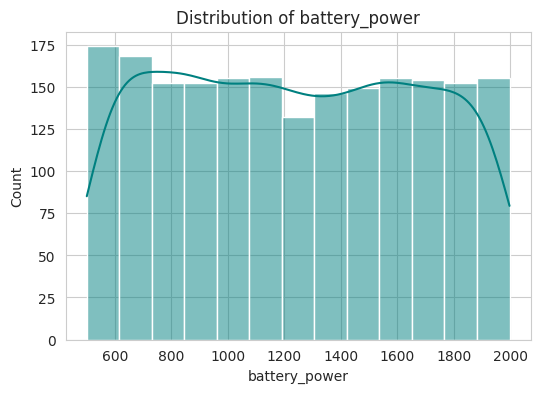

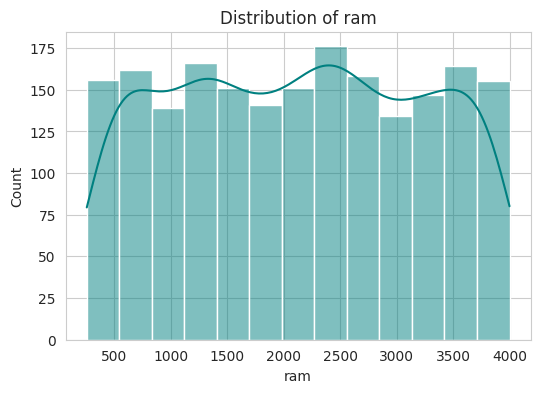

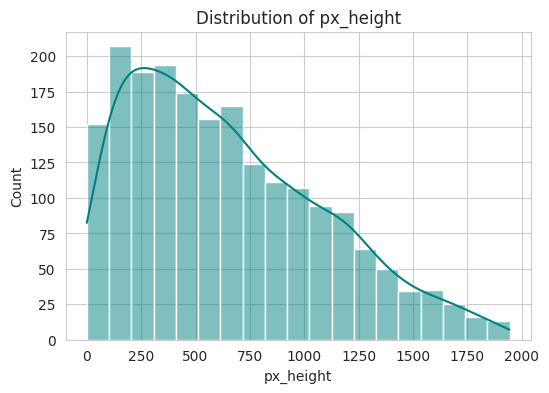

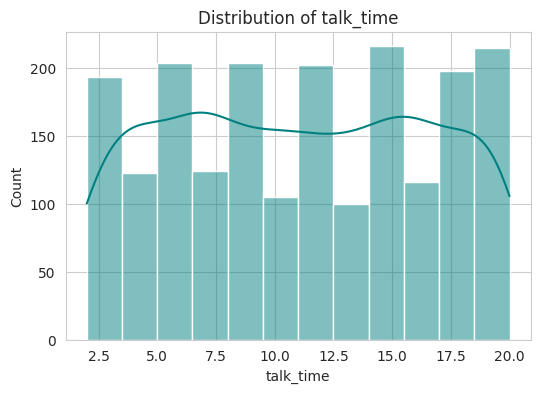

In [ ]:
important_features = ['battery_power', 'ram', 'px_height', 'talk_time']

for feature in important_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[feature], kde=True, color='teal')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


<ipython-input-20-55b08c772072>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y=feature, data=df, palette='coolwarm')


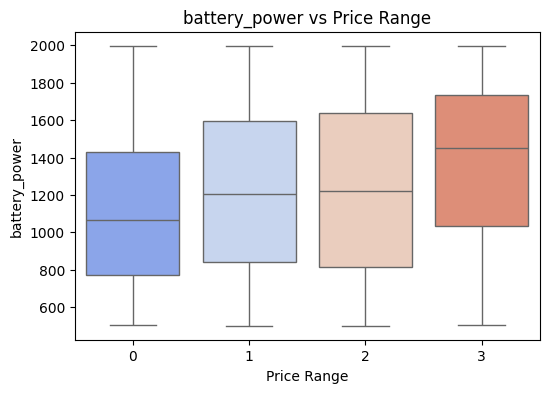

<ipython-input-20-55b08c772072>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y=feature, data=df, palette='coolwarm')


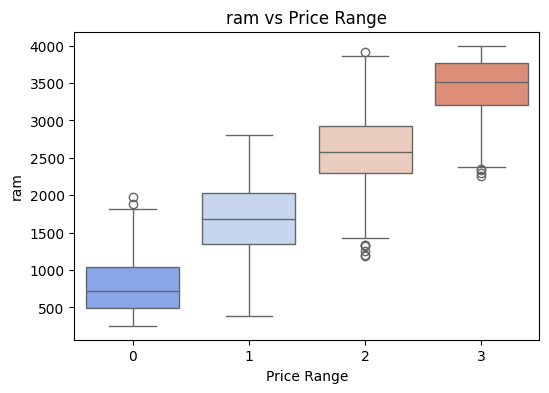

In [ ]:
features_to_plot = ['battery_power', 'ram']

for feature in features_to_plot:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='price_range', y=feature, data=df, palette='coolwarm')
    plt.title(f"{feature} vs Price Range")
    plt.xlabel('Price Range')
    plt.ylabel(feature)
    plt.show()


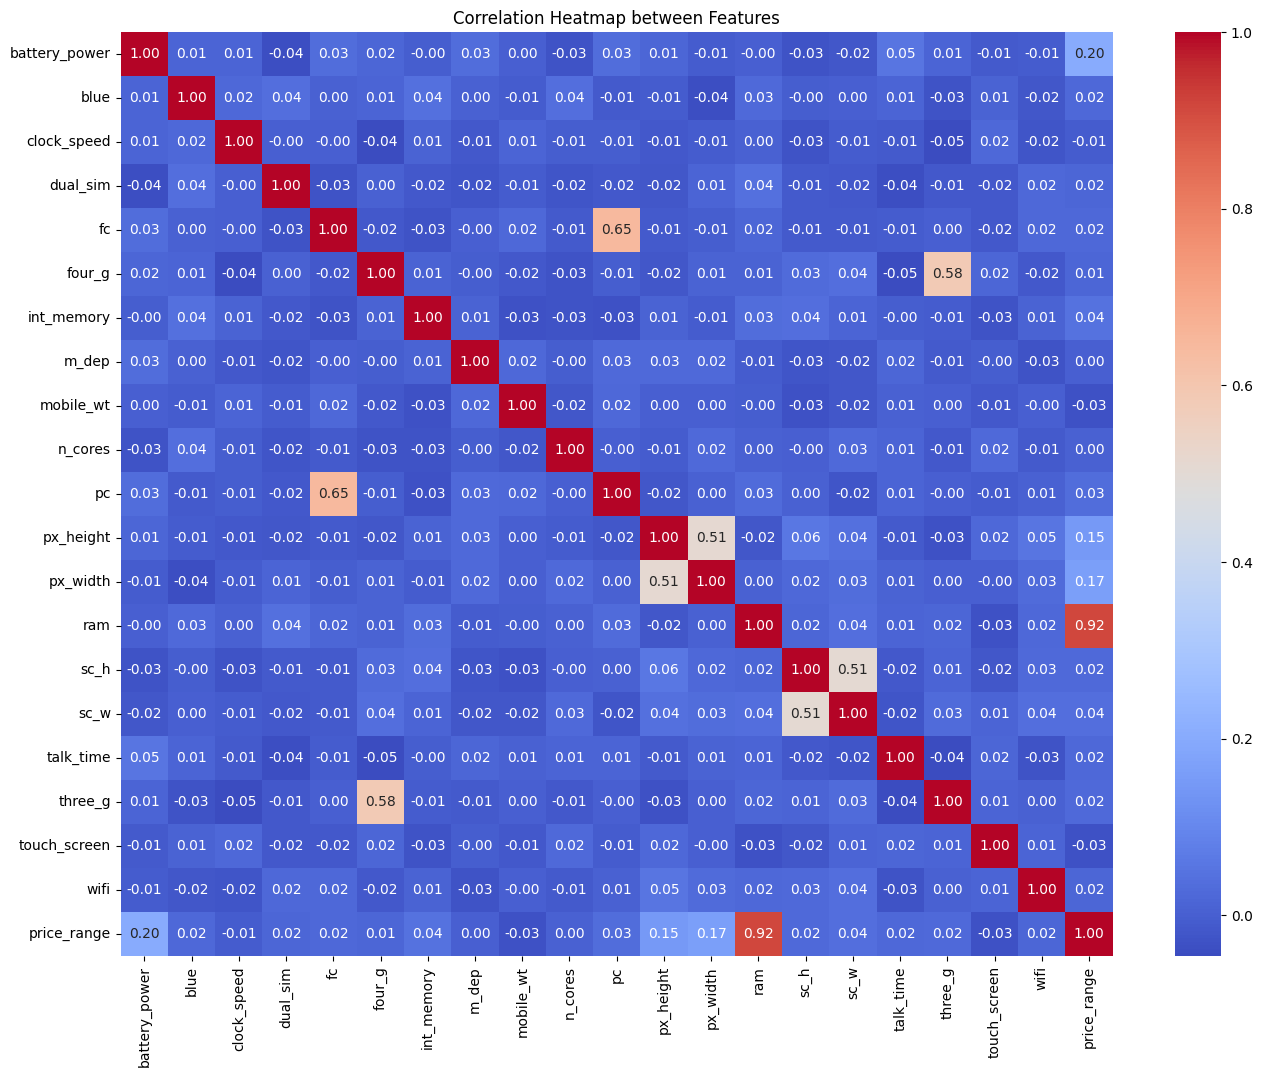

In [ ]:
plt.figure(figsize=(16,12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between Features')
plt.show()


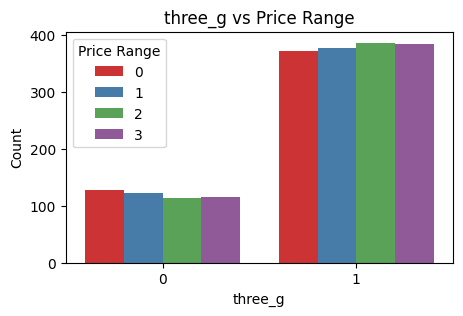

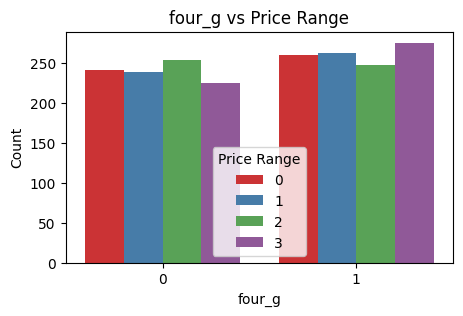

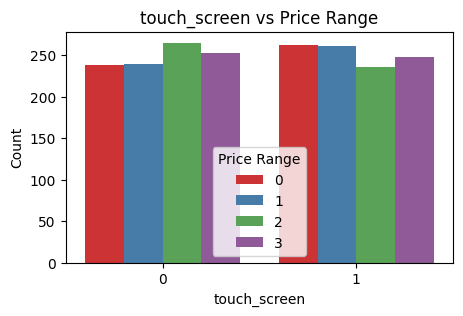

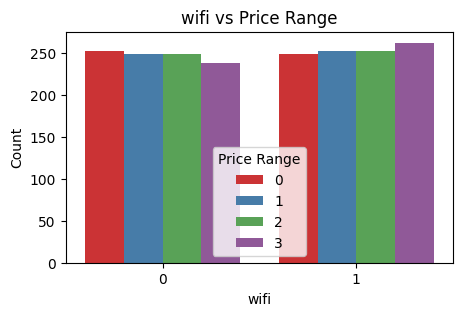

In [ ]:
binary_features = ['three_g', 'four_g', 'touch_screen', 'wifi']

for feature in binary_features:
    plt.figure(figsize=(5,3))
    sns.countplot(x=feature, hue='price_range', data=df, palette='Set1')
    plt.title(f"{feature} vs Price Range")
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Price Range')
    plt.show()


<ipython-input-36-6890321cbb07>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='price_range', y='battery_power', data=df, palette='muted')


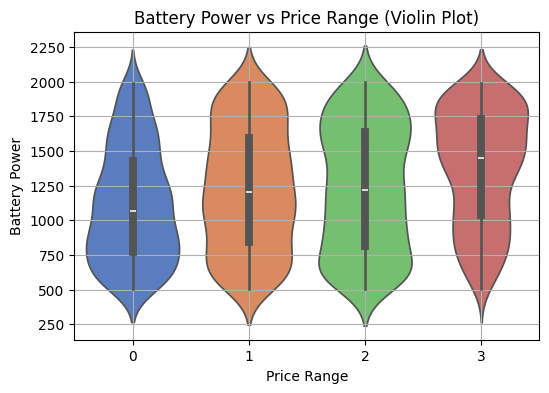

In [ ]:
plt.figure(figsize=(6,4))
sns.violinplot(x='price_range', y='battery_power', data=df, palette='muted')
plt.title('Battery Power vs Price Range (Violin Plot)')
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.grid(True)
plt.show()


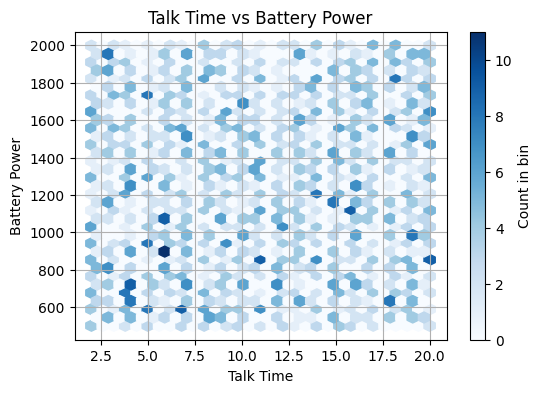

In [ ]:
plt.figure(figsize=(6, 4))
plt.hexbin(df['talk_time'], df['battery_power'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count in bin')
plt.title('Talk Time vs Battery Power')
plt.xlabel('Talk Time')
plt.ylabel('Battery Power')
plt.grid(True)
plt.show()

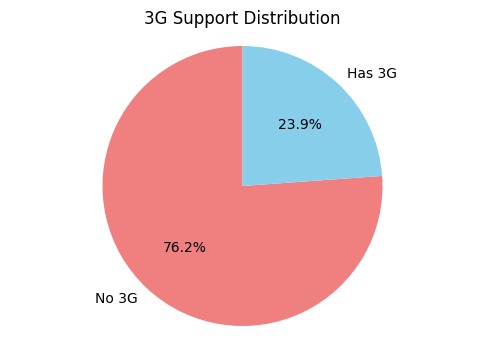

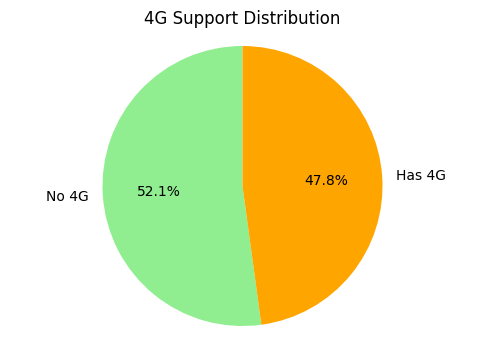

In [ ]:
# Three G
labels = ['No 3G', 'Has 3G']
sizes = df['three_g'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title('3G Support Distribution')
plt.axis('equal')
plt.show()

# Same for Four G
labels = ['No 4G', 'Has 4G']
sizes = df['four_g'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'orange'])
plt.title('4G Support Distribution')
plt.axis('equal')
plt.show()


# Scalling

In [ ]:
X = df.drop('price_range', axis=1)
y = df['price_range']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# training model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


model = GradientBoostingClassifier(random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("✅ Accuracy:", accuracy_score(y_test, y_pred))

print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.9125

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       100
           1       0.89      0.87      0.88       100
           2       0.86      0.86      0.86       100
           3       0.95      0.94      0.94       100

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400


📊 Confusion Matrix:
[[98  2  0  0]
 [ 5 87  8  0]
 [ 0  9 86  5]
 [ 0  0  6 94]]


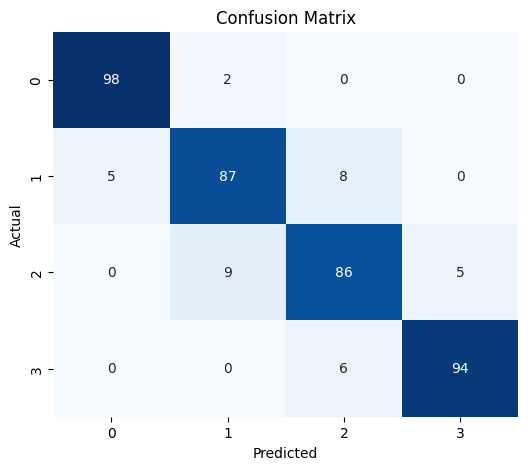

In [ ]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


<ipython-input-30-df1cbc935f13>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


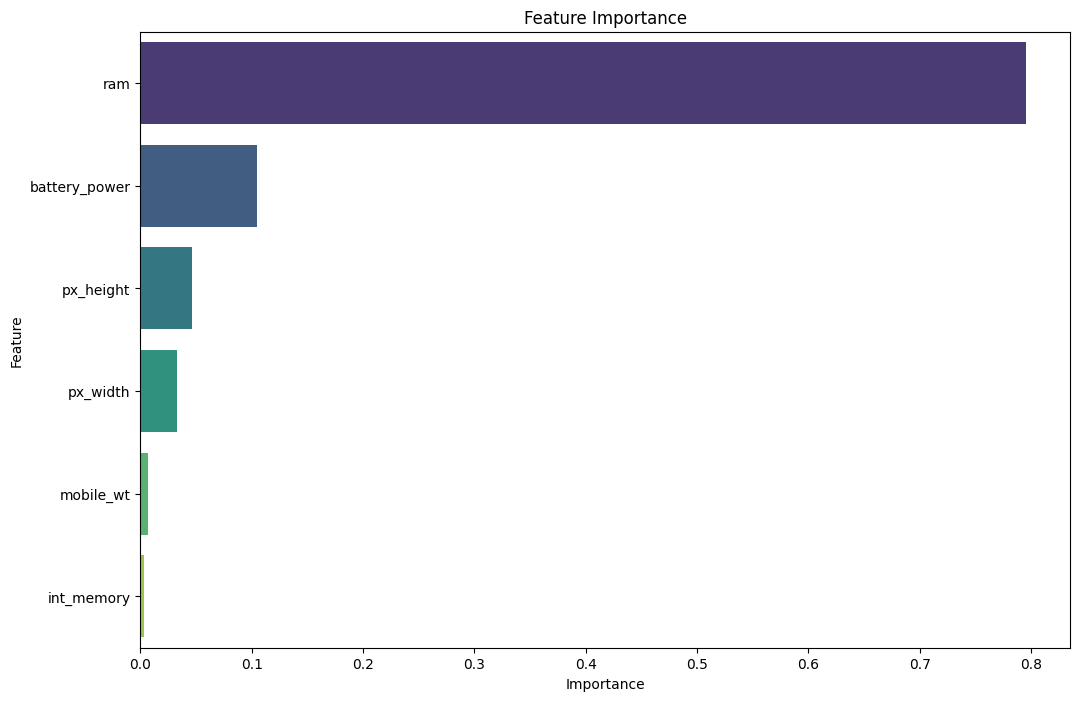

In [ ]:
feature_importance = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})


importance_df = importance_df.sort_values(by='Importance', ascending=False).head(6)


plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


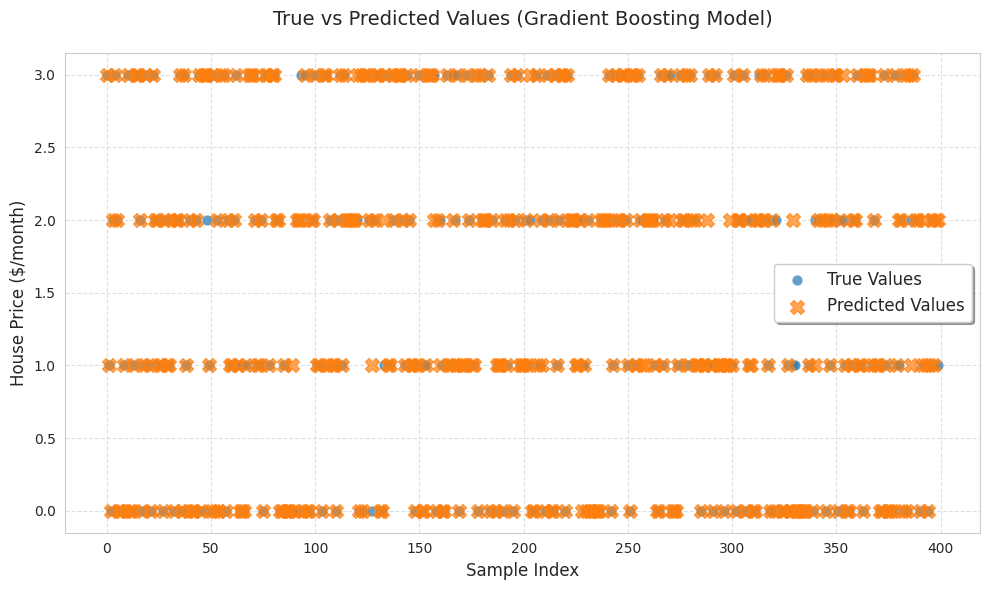

In [ ]:
# Set style for better aesthetics
sns.set_style("whitegrid")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='#1f77b4', s=60, alpha=0.7, label='True Values', edgecolors='w', linewidth=0.5)
plt.scatter(range(len(y_pred)), y_pred, color='#ff7f0e', marker='X', s=100, alpha=0.7, label='Predicted Values')

# Customize title and labels
plt.title("True vs Predicted Values (Gradient Boosting Model)", fontsize=14, pad=20)
plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("House Price ($/month)", fontsize=12)  # Update with your target variable name

# Add legend and grid
plt.legend(fontsize=12, framealpha=1, shadow=True)
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

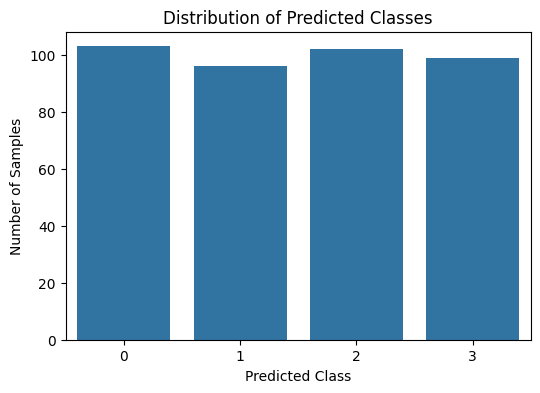

In [ ]:
# Distribution of predicted classes
plt.figure(figsize=(6,4))
sns.countplot(x=y_pred)
plt.title("Distribution of Predicted Classes")
plt.xlabel("Predicted Class")
plt.ylabel("Number of Samples")
plt.show()
